
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Predicting Movie Success</p>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

<h3 align="left"><font color=red>Project Overview::</font></h3>
This project aims to predict movie success categories using machine learning models based on IMDB scores. It involves extensive exploratory data analysis (EDA) to uncover key factors influencing success, followed by preprocessing and feature engineering to prepare the dataset. Experiment with different classification algorithms to identify the most effective model.

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

<h3 align="left"><font color=red>Objectives:</font></h3>
    
 Data Exploration: Conduct comprehensive EDA using visualization techniques to understand feature distributions and relationships with IMDB scores. 

Data Preprocessing: Handle missing values, perform label encoding for categorical variables, and address multicollinearity issues. 

Feature Engineering: Apply appropriate scaling techniques for numerical variables and consider feature importance analysis.

Categorize IMDB Scores: Create a new column Classify to categorize movies into "Hit", "Average", or "Flop" based on the IMDB score ranges(|1-3 | -Flop Movie,|3-6 |- Average Movie,|6-10 |- Hit Movie)

Model Selection: Evaluate various classification algorithms, with emphasis on Random Forest as demonstrated in the script. 

Performance Evaluation: Use appropriate metrics such as confusion matrix and classification report to assess model performance. 

Visualization: Create clear and informative visualizations using libraries like matplotlib and seaborn to communicate data insights and model performance. 


# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>



In [1]:
!pip install lightgbm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,roc_curve, auc, roc_auc_score,make_scorer,f1_score,precision_score,recall_score,average_precision_score)
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import StratifiedKFold,cross_val_predict
from sklearn.compose import ColumnTransformer
from collections import Counter
from imblearn.pipeline import Pipeline as ImbPipeline


In [3]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve


# <p style="background-color:red ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

In [4]:
df = pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0



# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>


In [5]:
df.shape

(5043, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [8]:
df.duplicated().sum()

45

In [9]:
df = df.drop_duplicates().reset_index(drop=True)
print("After dropping duplicates : ", df.shape)

After dropping duplicates :  (4998, 28)


In [10]:
# Creating a classify new column for classifying the movies according to the Imbd score into Hit(2),Agv(1),flop(0)
def classify_movie(score):
    if score <= 3:
        return 0   # Flop
    elif score <= 6:
        return 1   # Average
    else:
        return 2   # Hit

df['classify'] = df['imdb_score'].apply(classify_movie)


# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>



## Univarient Analysis

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

The distribution plots show that features such as budget, gross, and user/critic engagement are highly skewed, dominated by a few blockbuster movies, while IMDb score and duration follow more stable, bell-shaped distributions. This confirms the need for data transformations and robust scaling before model training.

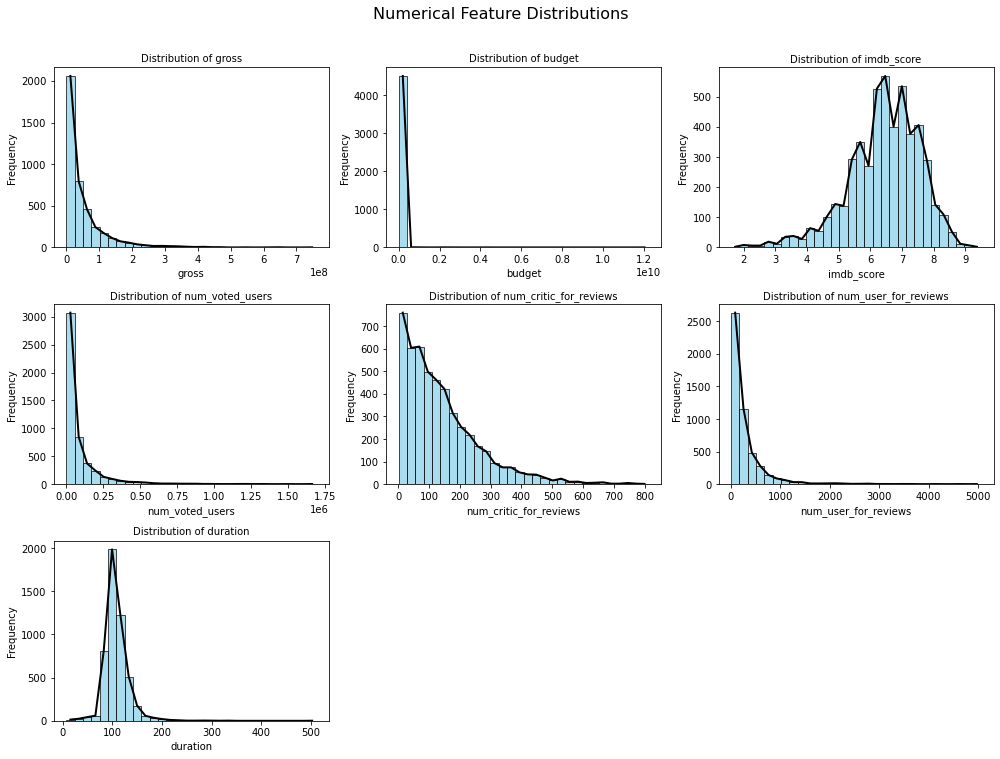

In [11]:
# Numerical columns
num_cols = ['gross', 'budget', 'imdb_score', 'num_voted_users',
            'num_critic_for_reviews', 'num_user_for_reviews', 'duration']

# Plot
plt.figure(figsize=(14, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)

    # Histogram (
    counts, bins, patches = plt.hist(df[col].dropna(), bins=30,
                                     color="skyblue", edgecolor="black", alpha=0.7)

    # Connective black line
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    plt.plot(bin_centers, counts, color="black", linewidth=2)

    # Labels & titles
    plt.title(f"Distribution of {col}", fontsize=10)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Numerical Feature Distributions",
             fontsize=16, y=1.05)
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
The distribution plots of Facebook likes show strong right-skewness across all features, with most actors, directors, and movies having very few likes, while a small number achieve exceptionally high popularity. Lead actor and movie Facebook likes stand out as potential predictors of movie success, while supporting actor and director likes provide additional but less impactful signals.


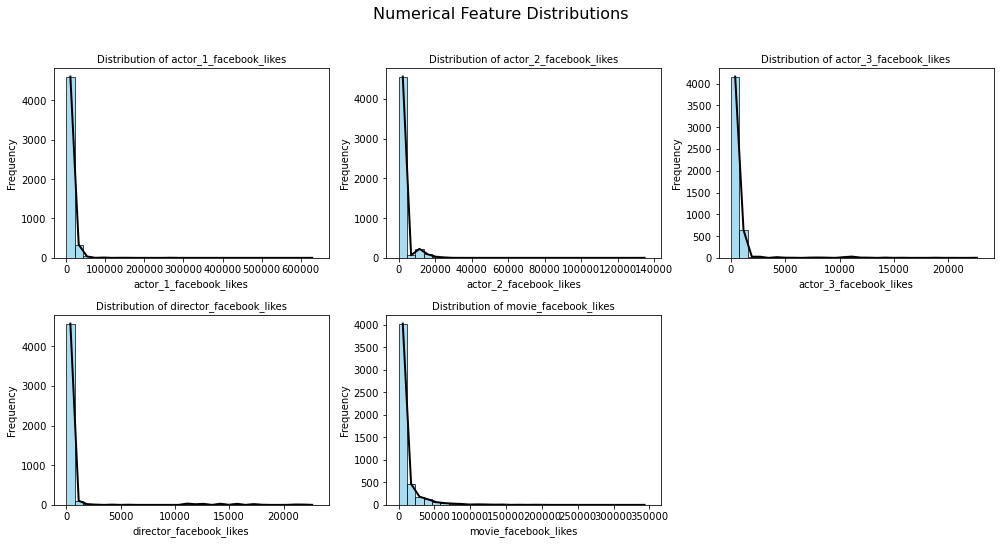

In [12]:

# Numerical columns
num_cols = ['actor_1_facebook_likes','actor_2_facebook_likes',
            'actor_3_facebook_likes',
    'director_facebook_likes','movie_facebook_likes',]

# Plot
plt.figure(figsize=(14, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)

    # Histogram
    counts, bins, patches = plt.hist(df[col].dropna(), bins=30,
                                     color="skyblue", edgecolor="black", alpha=0.7)

    # Connective black line
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    plt.plot(bin_centers, counts, color="black", linewidth=2)

    # Labels & titles
    plt.title(f"Distribution of {col}", fontsize=10)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Numerical Feature Distributions",
             fontsize=16, y=1.05)
plt.show()


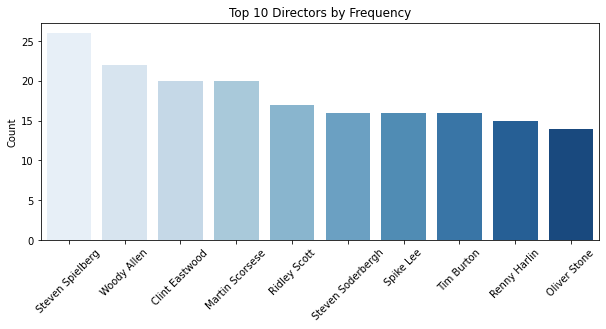

In [13]:
# Example: top directors by frequency
plt.figure(figsize=(10,4))
top_directors = df["director_name"].value_counts().head(10)
sns.barplot(x=top_directors.index, y=top_directors.values, palette="Blues")
plt.title("Top 10 Directors by Frequency")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()


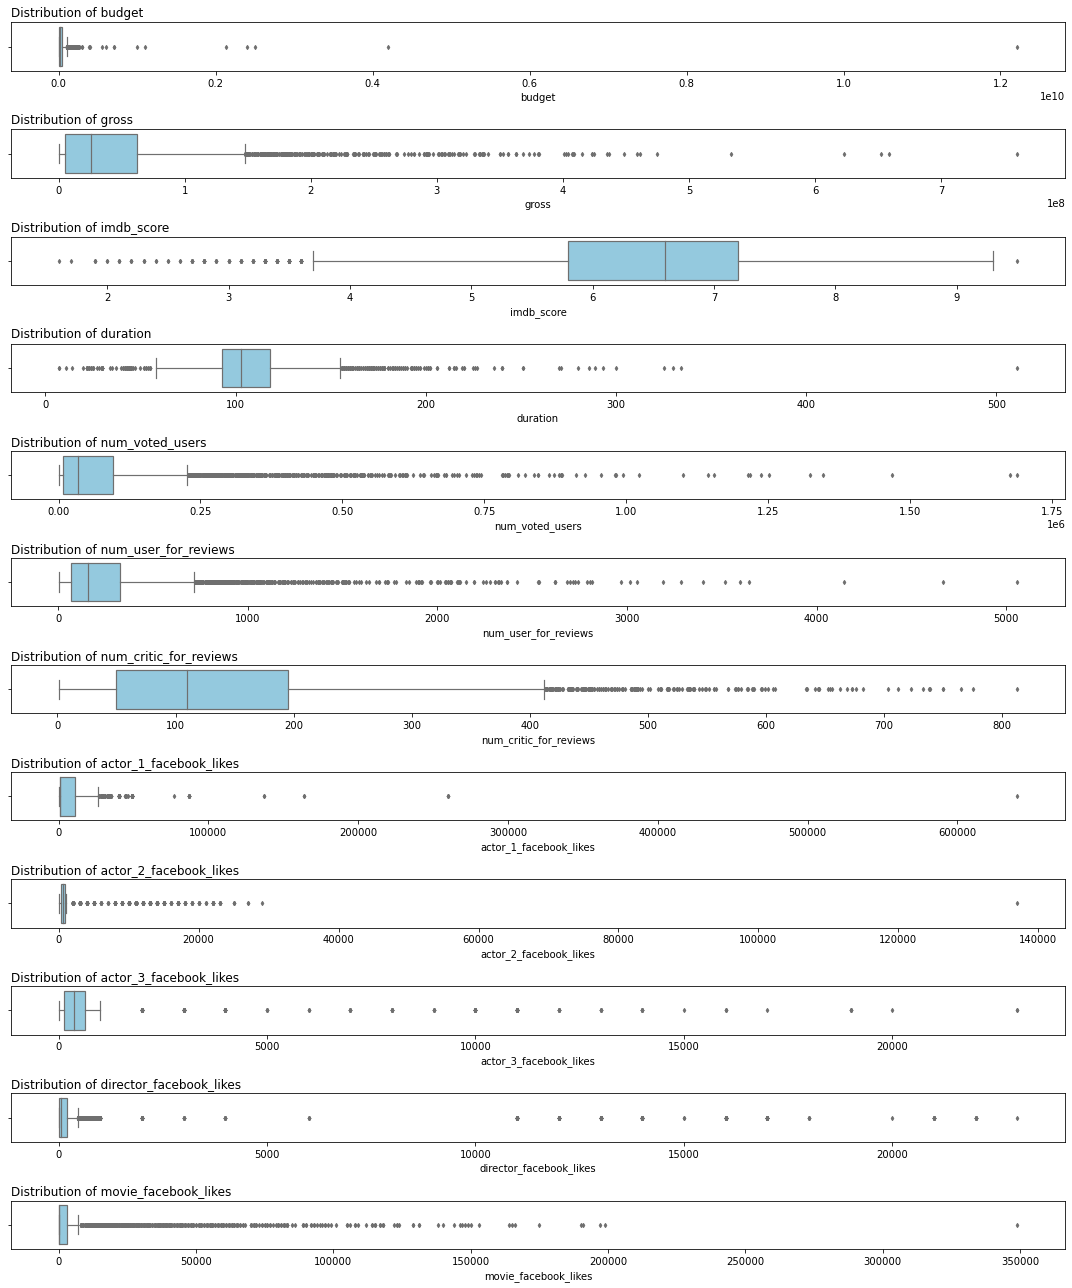

In [14]:
num_features = [
    "budget", "gross", "imdb_score", "duration",
    "num_voted_users", "num_user_for_reviews", "num_critic_for_reviews",
    "actor_1_facebook_likes", "actor_2_facebook_likes",
    "actor_3_facebook_likes", "director_facebook_likes", "movie_facebook_likes"
]

plt.figure(figsize=(15, 18))  # Wider layout for clarity

for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features), 1, i)  # one plot per row
    sns.boxplot(x=df[col], color="skyblue", fliersize=3, linewidth=1.2)
    plt.title(f"Distribution of {col}", fontsize=12, loc="left")
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

## Bivarient Analyis

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
The scatter plot shows the relationship between movie budget and gross revenue. Most movies have low budgets and revenues, while a few outliers exist with very high budgets. A positive trend can be observed, but some high-budget movies still earned low revenue. The majority of movies fall into class 2, with fewer in class 0 and class 1.

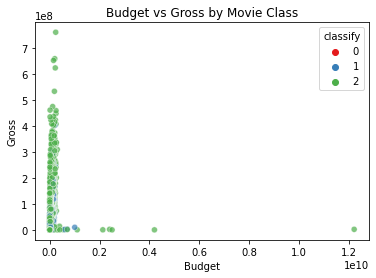

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="budget", y="gross", hue="classify", data=df, palette="Set1", alpha=0.7)
plt.title("Budget vs Gross by Movie Class")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
The scatter plot of Votes vs. Gross shows a positive relationship, where movies with more user votes generally achieve higher revenues. Most movies fall in the lower range of votes and gross, while hits (class 2) dominate the distribution. Flops (class 0) and average movies (class 1) mostly cluster at lower votes and earnings.

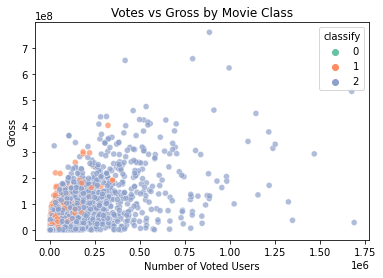

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="num_voted_users", y="gross", hue="classify", data=df, palette="Set2", alpha=0.7)
plt.title("Votes vs Gross by Movie Class")
plt.xlabel("Number of Voted Users")
plt.ylabel("Gross")
plt.show()


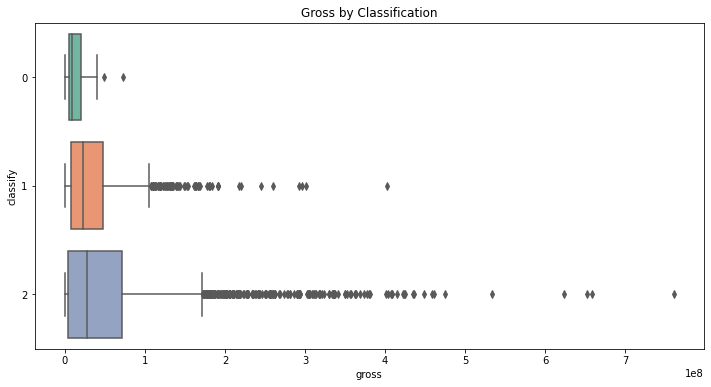

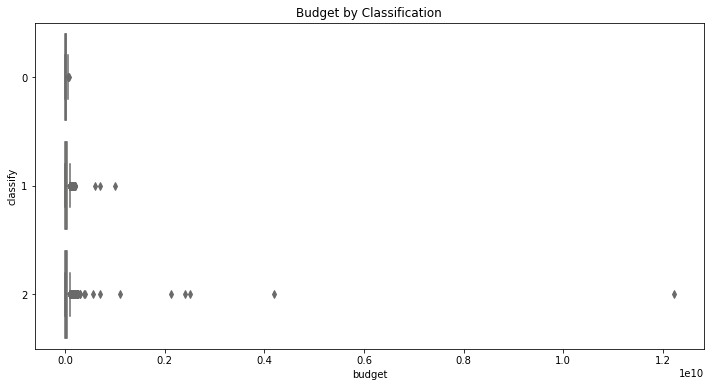

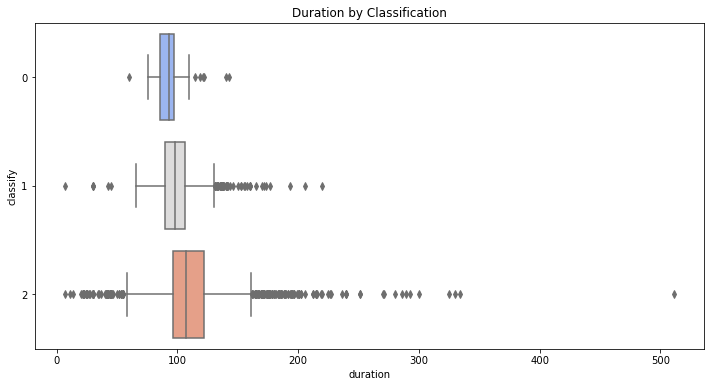

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(y='classify', x='gross', data=df, palette='Set2', orient='h')
plt.title("Gross by Classification")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(y='classify', x='budget', data=df, palette='Set3', orient='h')
plt.title("Budget by Classification")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(y='classify', x='duration', data=df, palette='coolwarm', orient='h')
plt.title("Duration by Classification")
plt.show()

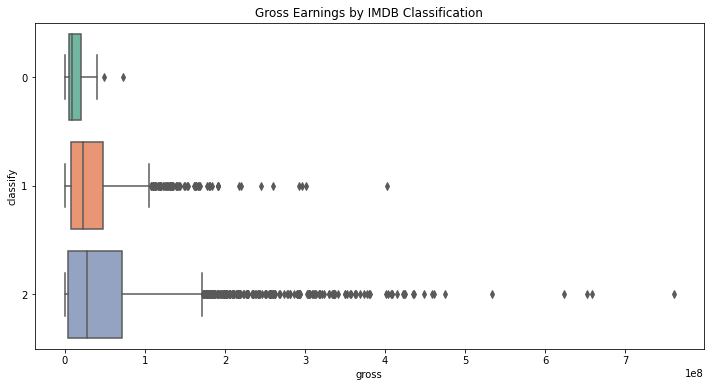

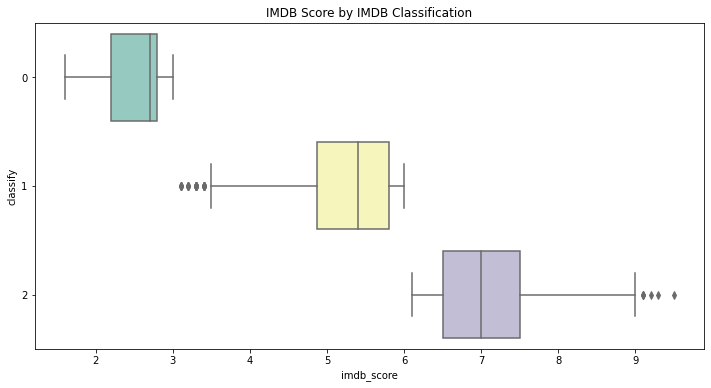

In [18]:
# Success Category vs Numerical Features

plt.figure(figsize=(12,6))
sns.boxplot(y='classify', x='gross', data=df, palette='Set2', orient='h')
plt.title("Gross Earnings by IMDB Classification")
plt.show()

# IMDB Score vs Classification
plt.figure(figsize=(12,6))
sns.boxplot(y='classify', x='imdb_score', data=df, palette='Set3', orient='h')
plt.title("IMDB Score by IMDB Classification")
plt.show()



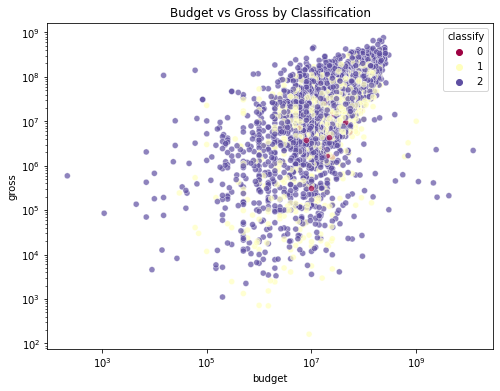

In [19]:
#Budget vs Gross (Scatterplot)
plt.figure(figsize=(8,6))
sns.scatterplot(x='budget', y='gross', hue='classify', data=df, alpha=0.7, palette='Spectral')
plt.xscale('log'); plt.yscale('log')
plt.title("Budget vs Gross by Classification")
plt.show()




<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
The scatter plot of IMDB Score vs. Number of Voted Users shows that flop movies (class 0) cluster at low scores with fewer votes, average movies (class 1) lie in the mid-score range with moderate votes, while hit movies (class 2) dominate higher scores and attract the largest number of votes, reflecting both better ratings and higher audience engagement.

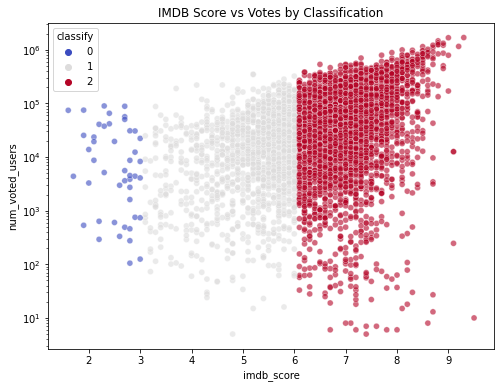

In [20]:
#IMDB score and votes
plt.figure(figsize=(8,6))
sns.scatterplot(x='imdb_score', y='num_voted_users', hue='classify', data=df, alpha=0.6, palette='coolwarm')
plt.yscale('log')
plt.title("IMDB Score vs Votes by Classification")
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
The line chart of Median Budget Across Decades shows that movie budgets remained low and stable until the mid-20th century, after which they began to rise steadily. From the 1980s onward, budgets increased sharply, with significant variability due to the rise of high-investment blockbusters. In recent decades, the industry has been characterized by consistently higher budgets compared to earlier eras.

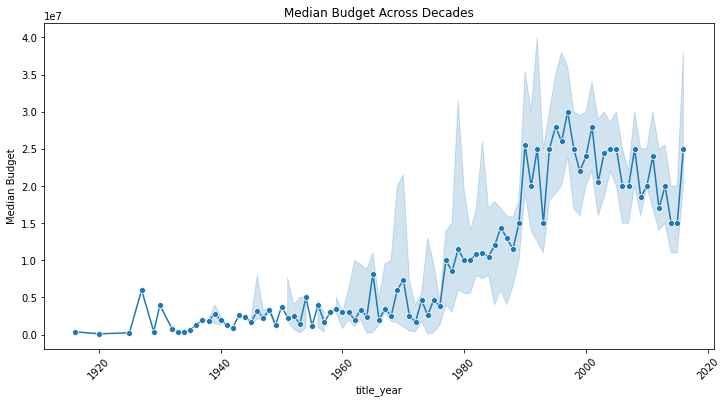

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x='title_year', y='budget', data=df, estimator=np.median, marker='o')
plt.xticks(rotation=45)
plt.title("Median Budget Across Decades")
plt.xlabel("title_year")
plt.ylabel("Median Budget")
plt.show()


## Pairplot

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">

The pairplot shows that gross revenue and number of voted users are strong indicators of movie success, with Hits clustering higher in both. Budget alone does not clearly separate Flops from Hits, as high- and low-budget movies
appear across categories. ROI highlights that some low-budget films achieve high profitability, while certain big-budget movies underperform, confirming the need for machine learning to capture these complex patterns.


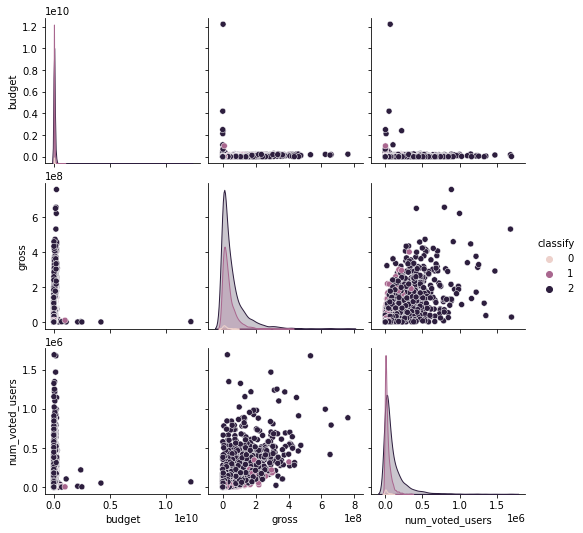

In [22]:
sns.pairplot(df[["budget","gross","num_voted_users","classify"]], hue="classify")
plt.show()



## Correlation Heatmap

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
The correlation heatmap shows that no single feature has a strong linear relationship with movie success (classify). Engagement-related variables (critic reviews, user reviews, votes) correlate moderately with gross and classify, while budget and Facebook likes have weaker predictive power. Strong inter-feature correlations suggest potential multicollinearity, reinforcing the need for advanced machine learning models rather than simple linear analysis.

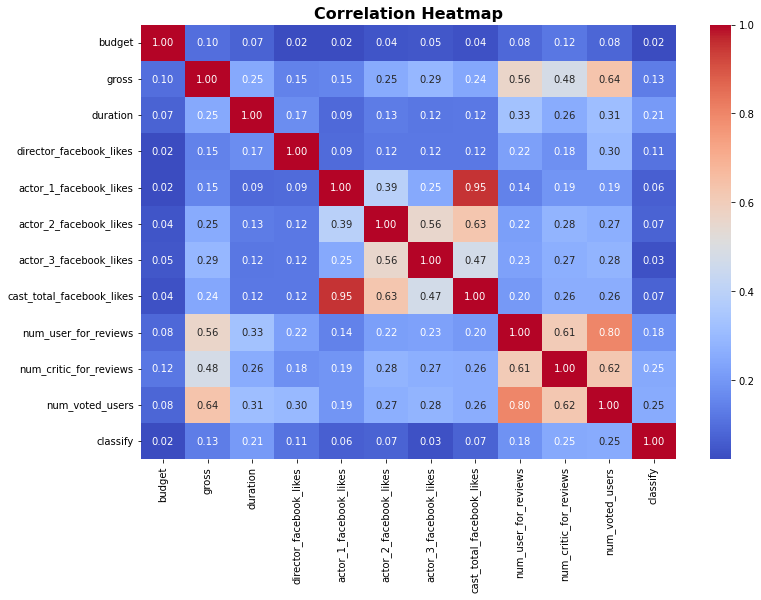

In [23]:
plt.figure(figsize=(12,8))  # Increase width and height
sns.heatmap(df[[
    "budget", "gross", "duration",
    'director_facebook_likes',
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'cast_total_facebook_likes',
    'num_user_for_reviews',
    'num_critic_for_reviews',
    'num_voted_users',
    "classify"
]].corr(),
annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap", fontsize=16, weight='bold')
plt.show()


# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
The genres column was split into individual genre labels, and using MultiLabelBinarizer, each genre was transformed into a separate binary column. This allows movies to be represented with multi-hot encoding, making the categorical genre data suitable for machine learning models.

In [24]:
#gener is splitted
df['genres_split'] = df['genres'].str.split('|')
mlb = MultiLabelBinarizer()
genre_encoded_array = mlb.fit_transform(df['genres_split'])
genre_encoded_df = pd.DataFrame(
    genre_encoded_array,
    columns=mlb.classes_,
    index=df.index # Align the indices with the original DataFrame
    )
df = pd.concat([df, genre_encoded_df], axis=1)

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
Missing values in the duration column were imputed using genre-specific medians. For each genre, the median duration was computed, and for multi-genre movies, the average of these medians was used. If genre information was missing, the global median duration was applied.

In [25]:
# Imputing the missing values of Duration using the  generes column

def impute_duration_with_genres(df, duration_col='duration'):
    # Detect genre columns automatically
    common_genres = {
        'Action','Adventure','Animation','Biography','Comedy','Crime','Documentary',
        'Drama','Family','Fantasy','Film-Noir','History','Horror','Music','Musical',
        'Mystery','News','Reality-TV','Romance','Sci-Fi','Short','Sport','Thriller','War','Western'
    }
    genre_cols = [c for c in df.columns if c in common_genres]

    # Per-genre median from known durations
    medians = {}
    for g in genre_cols:
        s = df.loc[df[duration_col].notna() & (df[g] == 1), duration_col]
        medians[g] = s.median() if len(s) else np.nan
    per_genre = pd.Series(medians).fillna(df[duration_col].median())

    # Vectorized average of medians per row
    weighted_sum = df[genre_cols].mul(per_genre, axis=1).sum(axis=1)
    counts = df[genre_cols].sum(axis=1)
    genre_avg = weighted_sum.divide(counts).where(counts > 0, other=df[duration_col].median())

    # Fill
    df[duration_col] = df[duration_col].fillna(genre_avg)
    return df

    #Imputing the median at missing durtion

    df = impute_duration_with_genres(df, duration_col='duration')

In [26]:
#Filling null values with unknown at director,actor1, actor2, actor3_name
df['director_name'] = df['director_name'].fillna("Unknown")
df['actor_1_name'] = df['actor_1_name'].fillna("Unknown")
df['actor_2_name'] = df['actor_2_name'].fillna("Unknown")
df['actor_3_name'] = df['actor_3_name'].fillna("Unknown")


## Handling Multicollinearity

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
I applied frequency encoding to capture how often each director/actor appears, and multiclass target encoding (with 5-fold CV) to estimate their likelihood of contributing to a Flop, Avg, or Hit. An expected-value feature was then created to summarize these probabilities into a single predictive score.

In [27]:
# Target column: 0=flop, 1=avg, 2=hit
y_col = "classify"
features = ['director_name','actor_1_name','actor_2_name','actor_3_name']

# Drop rows with missing target (or handle as needed)
df = df.dropna(subset=[y_col])
df[y_col] = df[y_col].astype(int)


# Frequency Encoding

for col in features:
    freq = df[col].value_counts(dropna=False)
    df[col + "_freq"] = df[col].map(freq).astype("float32")


# Multiclass Target Encoding

classes = [0, 1, 2]  # flop, avg, hit
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for col in features:
    # Create empty columns for class-wise probs
    for c in classes:
        df[f"{col}_te_c{c}"] = np.nan

# Out-of-fold mapping
    for tr_idx, val_idx in skf.split(df, df[y_col]):
        tr, val = df.iloc[tr_idx], df.iloc[val_idx]
        for c in classes:
            mean_enc = tr.groupby(col)[y_col].apply(lambda x: (x == c).mean())
            df.loc[val_idx, f"{col}_te_c{c}"] = val[col].map(mean_enc)

# Fill NaNs with global class proportions (fallback for unseen cats)
    for c in classes:
        global_mean = (df[y_col] == c).mean()
        df[f"{col}_te_c{c}"] = df[f"{col}_te_c{c}"].fillna(global_mean).astype("float32")


# Expected-Value (EV) feature per column


for col in features:
    df[f"{col}_te_ev"] = (
        0.0 * df[f"{col}_te_c0"] +
        1.0 * df[f"{col}_te_c1"] +
        2.0 * df[f"{col}_te_c2"]
    ).astype("float32")




<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
Missing values in director and actor Facebook likes were filled using a hybrid approach: if all values were missing for a person, they were set to 0; if some values existed, missing entries were replaced with the person’s median likes; and any remaining gaps were filled with the global median of the column.


In [28]:
# filling the null values of director, actor1, actor2, actor3 facebook likes


like_cols = [
    "director_facebook_likes",
    "actor_1_facebook_likes",
    "actor_2_facebook_likes",
    "actor_3_facebook_likes"
]

# Corresponding name columns
name_cols = {
    "director_facebook_likes": "director_name",
    "actor_1_facebook_likes": "actor_1_name",
    "actor_2_facebook_likes": "actor_2_name",
    "actor_3_facebook_likes": "actor_3_name"
}

# Hybrid imputation
for like_col in like_cols:
    name_col = name_cols[like_col]

# If a person has ALL NaN likes → set to 0 (no page)
    person_nulls = df.groupby(name_col)[like_col].transform(lambda x: x.isnull().all())
    df.loc[person_nulls & df[like_col].isnull(), like_col] = 0

# If a person has some likes, fill missing with their median
    df[like_col] = df.groupby(name_col)[like_col].transform(lambda x: x.fillna(x.median()))

# If still missing (rare, unknown person), fill with global median
    df[like_col].fillna(df[like_col].median(), inplace=True)

# Check missing values after imputation
print(df[like_cols].isnull().sum())


director_facebook_likes    0
actor_1_facebook_likes     0
actor_2_facebook_likes     0
actor_3_facebook_likes     0
dtype: int64


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
Missing values in title_year were filled using a genre-based median strategy. For each genre, missing years were replaced with that genre’s median release year, and any remaining gaps were filled with the global median year.

In [29]:
# Global median year
global_median_year = df['title_year'].median()


# Fill by genre median, fallback to global median
for genre in ['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary',
              'Drama','Family','Fantasy','Film-Noir','History','Horror','Music','Musical',
              'Mystery','News','Reality-TV','Romance','Sci-Fi','Short','Sport','Thriller','War','Western']:
    if genre in df.columns:
        genre_median = df.loc[df[genre]==1, 'title_year'].median()
        df.loc[(df['title_year'].isna()) & (df[genre]==1), 'title_year'] = genre_median


# Final fallback for any still-missing values
df['title_year'] = df['title_year'].fillna(global_median_year)

print(df['title_year'].isna().sum(), "missing values left")

0 missing values left


In [30]:
#created new colum decade

df['title_year'] = pd.to_numeric(df['title_year'], errors='coerce')

df = df.dropna(subset=['title_year'])

df['title_year'] = df['title_year'].astype(int)

df['decade'] = (df['title_year'] // 10) * 10

print(df[['title_year', 'decade']].head(10))



   title_year  decade
0        2009    2000
1        2007    2000
2        2015    2010
3        2012    2010
4        2008    2000
5        2012    2010
6        2007    2000
7        2010    2010
8        2015    2010
9        2009    2000


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
Missing values in the budget column were imputed using a hierarchical strategy. First, budgets were filled using the median of the same genre within the same decade. If that was not possible, the decade median was used as fallback, and any remaining missing values were replaced with the global median budget. This approach ensures that budget imputations reflect both genre-specific and time-specific spending trends.

In [31]:
#filling the missing and null values of budget by grouping with the genre and  decade

genre_cols = [c for c in df.columns if c in [
    'Action','Adventure','Animation','Biography','Comedy','Crime','Documentary',
    'Drama','Family','Fantasy','Film-Noir','History','Horror','Music','Musical',
    'Mystery','News','Reality-TV','Romance','Sci-Fi','Short','Sport','Thriller','War','Western'
]]


# Filled budget using (decade + genre) median
for genre in genre_cols:
    df['budget'] = df.groupby(['decade', genre])['budget']\
                     .transform(lambda x: x.fillna(x.median()))


# Fallback → fill any remaining with decade median
df['budget'] = df.groupby('decade')['budget']\
                 .transform(lambda x: x.fillna(x.median()))

# Final fallback → global median
df['budget'] = df['budget'].fillna(df['budget'].median())

print("Remaining missing budgets:", df['budget'].isna().sum())


Remaining missing budgets: 0


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
Missing values in the Gross column were imputed using a hierarchical strategy. First, gross were filled using the median of the same genre within the same decade. If that was not possible, the decade median was used as fallback, and any remaining missing values were replaced with the global median gross. This approach ensures that gross imputations reflect both genre-specific and time-specific spending trends.

In [32]:
#filling the missing and null values of gross by grouping with the genre and decade
for genre in genre_cols:
    df['gross'] = df.groupby(['decade', genre])['gross']\
                    .transform(lambda x: x.fillna(x.median()))

# Fallback → fill any remaining with decade median
df['gross'] = df.groupby('decade')['gross']\
                .transform(lambda x: x.fillna(x.median()))

# Final fallback → global median
df['gross'] = df['gross'].fillna(df['gross'].median())

print("Remaining missing gross values:", df['gross'].isna().sum())



Remaining missing gross values: 0


In [33]:
# filling the null values of num of users of review  by  grouping with the gener and decade
for genre in genre_cols:
    df['num_voted_users'] = df.groupby(['decade', genre])['num_user_for_reviews']\
                              .transform(lambda x: x.fillna(x.median()))

# Fallback → decade median
df['num_user_for_reviews'] = df.groupby('decade')['num_user_for_reviews']\
                          .transform(lambda x: x.fillna(x.median()))

#  Final fallback → global median
df['num_user_for_reviews'] = df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median())

print("Remaining missing voted users:", df['num_user_for_reviews'].isna().sum())



Remaining missing voted users: 0


In [34]:
#filling the null values of num of voted users  by grouping with the decade and
for genre in genre_cols:
    df['num_voted_users'] = df.groupby(['decade', genre])['num_voted_users']\
                              .transform(lambda x: x.fillna(x.median()))

# Fallback → decade median
df['num_voted_users'] = df.groupby('decade')['num_voted_users']\
                          .transform(lambda x: x.fillna(x.median()))

# Final fallback → global median
df['num_voted_users'] = df['num_voted_users'].fillna(df['num_voted_users'].median())

print("Remaining missing voted users:", df['num_voted_users'].isna().sum())

Remaining missing voted users: 0


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
The missing values in the num_critic_for_reviews column were handled using a stepwise imputation strategy. First, missing values were filled with the median of movies belonging to the same genre within the same decade. If still missing, they were replaced with the median of the respective decade. Finally, any remaining null values were filled with 0, indicating the absence of critic reviews.

In [35]:
# filling the null values of num of critic by grouping with the decade and year
for genre in genre_cols:
    df['num_critic_for_reviews'] = df.groupby(['decade', genre])['num_critic_for_reviews']\
                                     .transform(lambda x: x.fillna(x.median()))

# Fallback → decade median
df['num_critic_for_reviews'] = df.groupby('decade')['num_critic_for_reviews']\
                                 .transform(lambda x: x.fillna(x.median()))

# Final fallback → 0 (if any missing left)
df['num_critic_for_reviews'] = df['num_critic_for_reviews'].fillna(0)

print("Remaining missing critic reviews:", df['num_critic_for_reviews'].isna().sum())


Remaining missing critic reviews: 0


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
The missing values in the content_rating column were imputed using a genre-based mode; if still missing, they were filled with the global mode. Afterwards, the ratings were mapped into broader categories "Family", "Teen", "Adult", and "Other" to simplify analysis and maintain consistency across the dataset.

In [36]:
# filling the null values of content rating   by grouping with the gener
global_mode = df['content_rating'].mode()[0]

# Fill missing values by genre mode
for genre in ['Action','Adventure','Animation','Biography','Comedy','Crime','Documentary',
              'Drama','Family','Fantasy','Film-Noir','History','Horror','Music','Musical',
              'Mystery','News','Reality-TV','Romance','Sci-Fi','Short','Sport','Thriller','War','Western']:
    if genre in df.columns:  # only if genre is one-hot encoded
        # Get mode for this genre
        mode_val = df.loc[df[genre] == 1, 'content_rating'].mode()
        if not mode_val.empty:
            df.loc[df['content_rating'].isna() & (df[genre] == 1), 'content_rating'] = mode_val[0]

# Final fallback → fill with global mode
df['content_rating'] = df['content_rating'].fillna(global_mode)

print("Remaining missing in content_rating:", df['content_rating'].isna().sum())


#  mapped and categorized the rating
rating_map = {
    'G': 'Family',
    'PG': 'Family',
    'PG-13': 'Teen',
    'R': 'Adult',
    'NC-17': 'Adult',
    'Approved': 'Other',
    'Passed': 'Other',
    'Unrated': 'Other',
    'Not Rated': 'Other'
}
df['content_rating'] = df['content_rating'].map(rating_map).fillna('Other')

Remaining missing in content_rating: 0


In [37]:
# filled the null values of copountry by mode
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [38]:
# filled the null values of laguage with mode by grouping with the country
df['language'] = df.groupby('country')['language']\
                   .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Final fallback → global mode
df['language'] = df['language'].fillna(df['language'].mode()[0])


# Feature Enginnring

In [39]:
# creating new column cast_popularity
df["total_actor_likes"] = (df["actor_1_facebook_likes"]
    + df["actor_2_facebook_likes"]
    + df["actor_3_facebook_likes"]
)
df["cast_popularity"] = df["total_actor_likes"] + df["director_facebook_likes"]

In [40]:
# creating new column ROI = (Gross-budeget)/budget
df['roi'] = (df['gross'] - df['budget']) / df['budget']

# Replace infinities & fill NaNs
df['roi'] = df['roi'].replace([np.inf, -np.inf], np.nan).fillna(0)


# Encoding

In [41]:
#  One-hot encode mapped categories of content rating
rating_dummies = pd.get_dummies(df['content_rating'], prefix='rating', dtype=int)
df = pd.concat([df, rating_dummies], axis=1)

In [42]:
# there is large dataset of english and USA so thit two are classifies as the following
df['is_USA'] = (df['country'] == "USA").astype(int)
df['is_english'] = (df['language'].str.lower() == "english").astype(int)


In [43]:
movie_metadata_clean = df.copy()
movie_metadata_clean.to_csv("movie_metadata_clean", index=False, encoding="utf-8")

## Handling the skewnees of the data


In [44]:
# These columns should never be negative
nonneg_cols = [
    'budget', 'gross', 'num_voted_users', 'num_critic_for_reviews',
    'num_user_for_reviews', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
    'actor_3_facebook_likes', 'cast_total_facebook_likes',
    'director_facebook_likes', 'movie_facebook_likes'
]


#Calculating the skewness of each columns
skew_before = df[nonneg_cols].skew().sort_values(ascending=False)
print("Skewness BEFORE log1p:\n", skew_before, "\n")


# Creating new columns with _log suffix and applying log1p(x) = log(x+1)
for c in nonneg_cols:
    if c in df.columns:
        df[c + '_log'] = np.log1p(df[c])


# checking the skewness if of log transformed columns
log_cols = [c + '_log' for c in nonneg_cols if c in df.columns]
skew_after = df[log_cols].skew().sort_values(ascending=False)
print("Skewness AFTER log1p:\n", skew_after, "\n")




Skewness BEFORE log1p:
 budget                       50.444731
actor_1_facebook_likes       19.142190
cast_total_facebook_likes    12.923944
actor_2_facebook_likes       10.021526
actor_3_facebook_likes        7.315731
director_facebook_likes       5.277791
movie_facebook_likes          5.083321
num_voted_users               4.155323
num_user_for_reviews          4.155310
gross                         3.430368
num_critic_for_reviews        1.522331
dtype: float64 

Skewness AFTER log1p:
 movie_facebook_likes_log         0.188762
director_facebook_likes_log      0.131007
actor_1_facebook_likes_log      -0.412111
num_user_for_reviews_log        -0.663978
num_voted_users_log             -0.664018
actor_2_facebook_likes_log      -0.765322
num_critic_for_reviews_log      -0.969540
cast_total_facebook_likes_log   -1.058831
actor_3_facebook_likes_log      -1.195899
budget_log                      -1.234647
gross_log                       -1.596207
dtype: float64 



In [45]:
# Calculating the skewness if raw ROI
print("Skewness of ROI")
print(df['roi'].skew(), "\n")

q1, q99 = df['roi'].quantile([0.01, 0.99])
df['roi_winsor'] = df['roi'].clip(lower=q1, upper=q99)

# Calculating skewness of winsorized ROI
print("Skewness of ROI after applying winsorized")
print(df['roi_winsor'].skew())

Skewness of ROI
48.58093563069461 

Skewness of ROI after applying winsorized
6.630108096126464


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
Irrelevant, sparse, and leakage-prone columns such as identifiers, names, social media likes, and direct revenue-related attributes were dropped to retain only meaningful features for analysis and model training.

In [46]:
columns_to_drop = ['director_name','actor_1_name','actor_2_name','actor_3_name','language','country','content_rating',
                   'title_year','imdb_score','movie_imdb_link','movie_title','plot_keywords','color','facenumber_in_poster',
                   'budget','gross', 'num_voted_users', 'num_critic_for_reviews','num_user_for_reviews', 'actor_1_facebook_likes',
                   'actor_2_facebook_likes', 'actor_3_facebook_likes', 'cast_total_facebook_likes','director_facebook_likes', 'movie_facebook_likes',
                   'roi'
    ]

df = df.drop(columns=columns_to_drop)

In [47]:
# Target column
y = df['classify']

In [48]:
genre_col = [col for col in df.columns if col in ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'
]]
numeric_col = [
    'budget_log','gross_log','num_voted_users_log','num_critic_for_reviews_log',
    'num_user_for_reviews_log','actor_1_facebook_likes_log','cast_total_facebook_likes_log',
    'director_facebook_likes_log','movie_facebook_likes_log','roi_winsor','director_name_te_ev',
    'actor_1_name_te_ev', 'actor_2_name_te_ev', 'actor_3_name_te_ev','director_name_freq',
    'actor_1_name_freq','actor_2_name_freq','actor_3_name_freq'
]
binary_col = ['is_USA', 'is_english', 'rating_Adult','rating_Family', 'rating_Other', 'rating_Teen']
time_col = ['decade']

In [49]:
X = df[numeric_col + binary_col + time_col + genre_col]

## The dataset is divided into training and test subsets for model evaluation.

In [50]:
# data split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y )


<a id="dt"></a>
# <p style="background-color:red; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Model Building</p>


<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
The data was first scaled using RobustScaler to handle outliers, and then SMOTE was applied to balance the minority classes (Flop and Avg) against the dominant Hit class. Three ensemble models were trained — RandomForest, XGBoost, and LightGBM — all configured for multiclass classification with imbalance
handling. To improve prediction fairness, threshold tuning was performed using Precision-Recall curves, where the best cutoff for each class was selected based on the highest F1-score. The models were evaluated with StratifiedKFold cross-validation to ensure stable results across folds, retrained on the resampled dataset, and then tested using the tuned thresholds. Finally, performance was assessed with a classification report (precision, recall, F1) and a confusion matrix, providing a robust evaluation framework for imbalanced movie success prediction.

In [51]:

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=400, class_weight="balanced", random_state=42, n_jobs=-1
    ),
    "XGBoost": XGBClassifier(
        n_estimators=400, max_depth=6, learning_rate=0.05,
        objective="multi:softprob", num_class=3,
        eval_metric="mlogloss", random_state=42
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=400, learning_rate=0.05,
        class_weight="balanced", objective="multiclass", num_class=3,
        random_state=42
    )
}


def tune_thresholds(model, X_val, y_val, num_classes=3):
    y_val_proba = model.predict_proba(X_val)
    thresholds = []
    for cls in range(num_classes):
        precisions, recalls, thres = precision_recall_curve((y_val == cls).astype(int), y_val_proba[:, cls])
        f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-9)
        best_idx = np.argmax(f1_scores)
        best_thres = thres[best_idx] if best_idx < len(thres) else 0.5
        thresholds.append(best_thres)
    return thresholds

def predict_with_thresholds(model, X, thresholds):
    proba = model.predict_proba(X)
    preds = []
    for row in proba:
        adjusted = [1 if row[i] >= thresholds[i] else 0 for i in range(len(thresholds))]
        if sum(adjusted) == 0:
            preds.append(np.argmax(row))  # fallback
        elif sum(adjusted) == 1:
            preds.append(np.argmax(adjusted))
        else:
            preds.append(np.argmax(row * adjusted))
    return np.array(preds)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n {name} ")


    y_val_proba = cross_val_predict(model, X_resampled, y_resampled, cv=cv, method="predict_proba")



    thresholds = []
    for cls in range(3):
        precisions, recalls, thres = precision_recall_curve((y_resampled == cls).astype(int), y_val_proba[:, cls])
        f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-9)
        best_idx = np.argmax(f1_scores)
        best_thres = thres[best_idx] if best_idx < len(thres) else 0.5
        thresholds.append(best_thres)

    print("Optimal Thresholds:", thresholds)

    # Train on resampled data
    model.fit(X_resampled, y_resampled)

    # Predict with tuned thresholds
    y_pred = predict_with_thresholds(model, X_test, thresholds)

    # Evaluation
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=3))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



 RandomForest 
Optimal Thresholds: [0.5425, 0.45, 0.4125]

Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000         9
           1      0.685     0.649     0.667       305
           2      0.845     0.876     0.860       686

    accuracy                          0.799      1000
   macro avg      0.510     0.508     0.509      1000
weighted avg      0.789     0.799     0.794      1000

Confusion Matrix:
[[  0   6   3]
 [  0 198 107]
 [  0  85 601]]

 XGBoost 


/home/noone/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/noone/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/noone/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Optimal Thresholds: [0.58863944, 0.45636502, 0.37858787]

Classification Report:
              precision    recall  f1-score   support

           0      0.333     0.111     0.167         9
           1      0.655     0.630     0.642       305
           2      0.839     0.862     0.850       686

    accuracy                          0.784      1000
   macro avg      0.609     0.534     0.553      1000
weighted avg      0.779     0.784     0.781      1000

Confusion Matrix:
[[  1   7   1]
 [  1 192 112]
 [  1  94 591]]

 LightGBM 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10023
[LightGBM] [Info] Number of data points in the train set: 6580, number of used features: 48
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] 

# Hyperparameter Tunning
<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
Hyperparameter tuning was performed using RandomizedSearchCV for RandomForest, XGBoost, and LightGBM. Parameters such as the number of trees, tree depth, learning rate, subsampling ratios, and class weights were optimized using 3-fold cross-validation with macro F1-score as the evaluation metric. This ensured balanced performance across the imbalanced classes and improved the generalization ability of all three models.

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# RandomForest Hyperparameter Grid
rf_param_grid = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": ["balanced"]
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_grid,
    n_iter=10, cv=3, scoring="f1_macro", random_state=42, n_jobs=-1
)
rf_search.fit(X_resampled, y_resampled)
print("Best RF Params:", rf_search.best_params_)

# XGBoost Hyperparameter Grid
xgb_param_grid = {
    "n_estimators": [200, 400, 600],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    XGBClassifier(objective="multi:softprob", num_class=3, eval_metric="mlogloss", random_state=42, use_label_encoder=False),
    xgb_param_grid,
    n_iter=10, cv=3, scoring="f1_macro", random_state=42, n_jobs=-1
)
xgb_search.fit(X_resampled, y_resampled)
print("Best XGB Params:", xgb_search.best_params_)

# LightGBM Hyperparameter Grid
lgbm_param_grid = {
    "n_estimators": [200, 400, 600],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [-1, 10, 20],
    "num_leaves": [31, 50, 100],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

lgbm_search = RandomizedSearchCV(
    LGBMClassifier(objective="multiclass", num_class=3, class_weight="balanced", random_state=42),
    lgbm_param_grid,
    n_iter=10, cv=3, scoring="f1_macro", random_state=42, n_jobs=-1
)
lgbm_search.fit(X_resampled, y_resampled)
print("Best LGBM Params:", lgbm_search.best_params_)


Best RF Params: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'class_weight': 'balanced'}


/home/noone/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:04:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/noone/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:04:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/noone/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:04:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/noone/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:04:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/noone/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:04:26] WARNING: /workspa

Best XGB Params: {'subsample': 0.8, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9835
[LightGBM] [Info] Number of data points in the train set: 5484, number of used features: 48
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

# Model Evalution
* Accuracy

* Precision

* Recall

* F1-score

* ROC-AUC

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
The best-tuned RandomForest, XGBoost, and LightGBM models are trained on the resampled data and tested on the hold-out set. Their performance is evaluated using accuracy, precision, recall, and F1-score (macro average) to ensure fair comparison across Flop, Avg, and Hit classes.

In [53]:
best_rf = rf_search.best_estimator_
best_xgb = xgb_search.best_estimator_
best_lgbm = lgbm_search.best_estimator_

models = {
    "RandomForest": best_rf,
    "XGBoost": best_xgb,
    "LightGBM": best_lgbm
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    print(f"\n{name} Results:")
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall:    {recall:.3f}")
    print(f"F1 Score:  {f1:.3f}")


/home/noone/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/noone/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:07:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



RandomForest Results:
Accuracy:  0.802
Precision: 0.512
Recall:    0.512
F1 Score:  0.512

XGBoost Results:
Accuracy:  0.793
Precision: 0.672
Recall:    0.538
F1 Score:  0.563
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10501
[LightGBM] [Info] Number of data points in the train set: 8226, number of used features: 48
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612

LightGBM Results:
Accuracy:  0.798
Precision: 0.622
Recall:    0.541
F1 Score:  0.563


## Confusion Matrix + ROC-AUC Curves

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
The RandomForest, XGBoost, and LightGBM models were evaluated using ROC-AUC to measure their ability to distinguish between Flop, Avg, and Hit movies. RandomForest achieved the most balanced performance with a macro ROC-AUC of 0.855, showing strong and consistent results across all classes, though the Flop class performed slightly lower due to imbalance. XGBoost obtained a macro ROC-AUC of around 0.83, performing well on Avg and Hit but weaker on Flops (AUC = 0.75), indicating bias toward majority classes. LightGBM delivered a macro ROC-AUC of approximately 0.85, striking a good balance by improving Flop detection over XGBoost while maintaining strong results on Avg and Hit. Overall, all three models demonstrate strong discriminative ability, with RandomForest being the most balanced and LightGBM offering an efficient trade-off between accuracy and minority class performance.

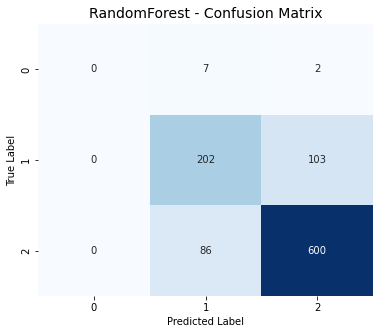

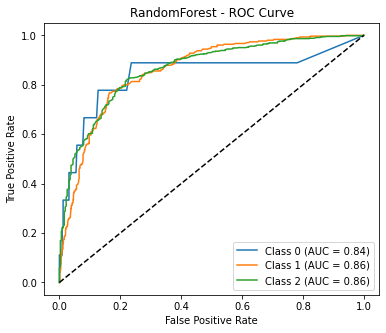

RandomForest Macro ROC-AUC: 0.855


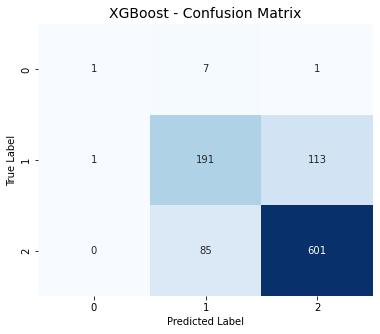

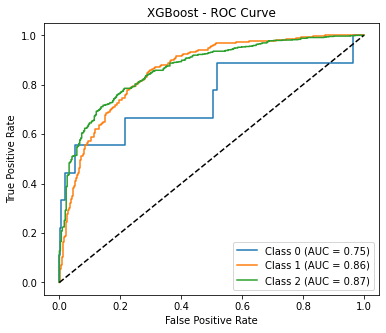

XGBoost Macro ROC-AUC: 0.823


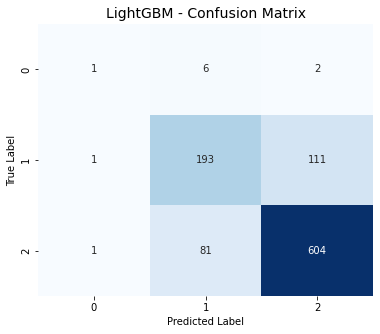

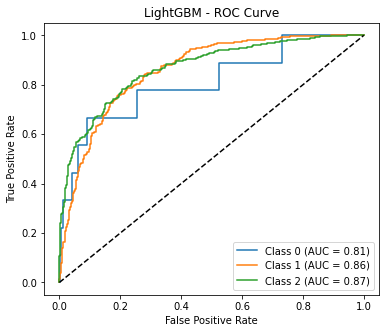

LightGBM Macro ROC-AUC: 0.845


In [54]:

y_test_bin = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test_bin.shape[1]

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    #  Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix", fontsize=14)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC-AUC
    plt.figure(figsize=(6,5))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.plot([0,1], [0,1], "k--")
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    # Overall Macro ROC-AUC
    macro_auc = roc_auc_score(y_test_bin, y_proba, average="macro")
    print(f"{name} Macro ROC-AUC: {macro_auc:.3f}")


## Precision Recall

<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:115%; text-align:left">
The Precision-Recall analysis shows that the RandomForest model performs very well on Hit movies (AP = 0.93) and moderately on Avg movies (AP = 0.71). However, its performance on Flop movies is poor (AP = 0.19), confirming that the class imbalance severely impacts minority class predictions. This highlights the importance of either collecting more Flop data

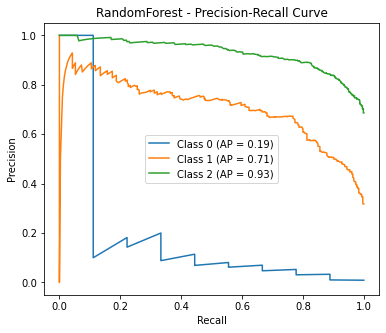

RandomForest Macro Average Precision: 0.611


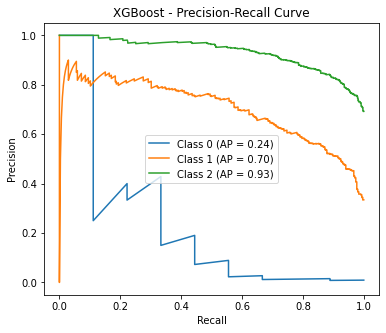

XGBoost Macro Average Precision: 0.626


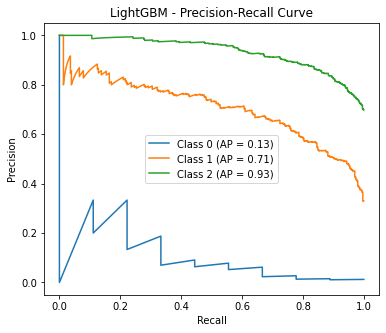

LightGBM Macro Average Precision: 0.589


In [55]:

# Binarize target for PR curve (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

for name, model in models.items():
    y_proba = model.predict_proba(X_test)

    plt.figure(figsize=(6,5))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
        ap = average_precision_score(y_test_bin[:, i], y_proba[:, i])
        plt.plot(recall, precision, label=f"Class {i} (AP = {ap:.2f})")

    plt.title(f"{name} - Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()

    # Macro average precision
    macro_ap = average_precision_score(y_test_bin, y_proba, average="macro")
    print(f"{name} Macro Average Precision: {macro_ap:.3f}")
